# Pair Trading With Cryptocurrencies

## How To Implement A Pair Trading Strategy Using Python

## Introduction
...

Import packages

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series, DataFrame

In [4]:
import pickle

In [5]:
import matplotlib.pyplot as plt

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

## Data Preparation

Load data

In [8]:
with open('data_bitfinex.pickle', 'rb') as f:
    data = pickle.load(f)
    
f.close()

Collect tickers

In [9]:
tickers = list(data.columns.levels[0])

In [10]:
tickers

['BCCUSD',
 'BCUUSD',
 'BTCUSD',
 'DSHUSD',
 'EOSUSD',
 'ETCUSD',
 'ETHUSD',
 'LTCUSD',
 'RRTUSD',
 'SANUSD',
 'XMRUSD',
 'XRPUSD',
 'ZECUSD']

Create a dictionary of last prices

In [11]:
last_dict = {}

In [12]:
for i in tickers:
    last_dict[i] = data[i].Last

Convert dictionary of last prices to DataFrame

In [13]:
last = pd.DataFrame(last_dict)

Check

In [14]:
last.head()

,BCCUSD,BCUUSD,BTCUSD,DSHUSD,EOSUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,SANUSD,XMRUSD,XRPUSD,ZECUSD
Date,,,,,,,,,,,,,
2017-05-19,1787.6,201.30,1970.0,98.028,NaN,7.4993,125.79,26.824,0.090696,NaN,31.498,0.31800,105.84
2017-05-20,1820.0,193.85,2068.0,102.450,NaN,7.1010,126.30,27.467,0.090696,NaN,35.342,0.34689,106.75
2017-05-21,1753.0,200.15,2037.9,102.010,NaN,7.6000,144.40,26.050,0.088110,NaN,34.140,0.33345,117.71
2017-05-22,1850.0,200.00,1981.9,115.020,NaN,7.9482,137.00,23.291,0.089990,NaN,34.889,0.28001,194.10
2017-05-23,2000.0,214.53,2228.0,132.250,NaN,9.9974,167.02,29.750,0.092496,NaN,53.326,0.32090,250.00


In [15]:
last.tail()

,BCCUSD,BCUUSD,BTCUSD,DSHUSD,EOSUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,SANUSD,XMRUSD,XRPUSD,ZECUSD
Date,,,,,,,,,,,,,
2019-05-19,NaN,NaN,8174.8,164.46,6.477079,7.8201,261.43,96.002,0.043800,1.02730,89.805,0.42290,77.911
2019-05-20,NaN,NaN,7914.4,167.43,6.242500,7.3603,250.53,90.967,0.043700,0.97400,86.704,0.39650,75.697
2019-05-21,NaN,NaN,7966.9,166.99,6.301800,7.4557,256.60,91.729,0.042301,0.96700,89.026,0.39900,75.178
2019-05-22,NaN,NaN,7729.7,155.95,5.964400,6.9617,245.78,88.645,0.042270,0.98555,84.304,0.37734,70.679
2019-05-23,NaN,NaN,7891.3,154.52,6.064500,7.0569,246.10,89.251,0.042270,0.93645,84.664,0.38003,71.724


In [16]:
last.describe()

,BCCUSD,BCUUSD,BTCUSD,DSHUSD,EOSUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,SANUSD,XMRUSD,XRPUSD,ZECUSD
count,215.000000,215.000000,712.000000,712.000000,483.000000,712.000000,712.000000,711.000000,711.000000,472.000000,712.000000,712.000000,711.000000
mean,4797.132093,292.164488,6297.287691,287.632192,3.683205,14.281943,368.428862,84.798965,0.078213,0.602140,125.295864,0.468881,205.455135
std,3809.541788,156.675981,3046.770749,231.953919,2.227089,8.135075,254.802203,58.395382,0.056773,0.662396,88.610652,0.364259,132.558672
min,1345.000000,64.000000,1949.900000,59.512000,0.488800,3.452200,85.039000,21.845000,0.033010,0.145010,29.744000,0.148210,47.051000
25%,2398.300000,192.970000,3965.200000,132.195000,1.788650,7.451100,178.225000,46.686500,0.040348,0.310993,53.109000,0.261860,85.598500
50%,3500.000000,230.010000,6284.350000,202.760000,3.590000,13.954500,292.545000,61.000000,0.056213,0.456895,101.530000,0.335150,191.270000
75%,5310.600000,387.550000,7681.375000,348.690000,5.395750,17.399750,471.400000,100.087500,0.085495,0.629570,161.325000,0.525350,270.150000
max,19433.000000,810.000000,19210.000000,1424.600000,11.491000,42.416000,1380.000000,355.510000,0.372000,4.642000,470.990000,2.760400,753.570000


Drop cryptocurrencies which have less than 2y data

In [17]:
last.drop(['BCCUSD', 'BCUUSD', 'EOSUSD', 'SANUSD'], axis='columns', inplace=True)

Check

In [18]:
last.describe()

,BTCUSD,DSHUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,XMRUSD,XRPUSD,ZECUSD
count,712.000000,712.000000,712.000000,712.000000,711.000000,711.000000,712.000000,712.000000,711.000000
mean,6297.287691,287.632192,14.281943,368.428862,84.798965,0.078213,125.295864,0.468881,205.455135
std,3046.770749,231.953919,8.135075,254.802203,58.395382,0.056773,88.610652,0.364259,132.558672
min,1949.900000,59.512000,3.452200,85.039000,21.845000,0.033010,29.744000,0.148210,47.051000
25%,3965.200000,132.195000,7.451100,178.225000,46.686500,0.040348,53.109000,0.261860,85.598500
50%,6284.350000,202.760000,13.954500,292.545000,61.000000,0.056213,101.530000,0.335150,191.270000
75%,7681.375000,348.690000,17.399750,471.400000,100.087500,0.085495,161.325000,0.525350,270.150000
max,19210.000000,1424.600000,42.416000,1380.000000,355.510000,0.372000,470.990000,2.760400,753.570000


Plot

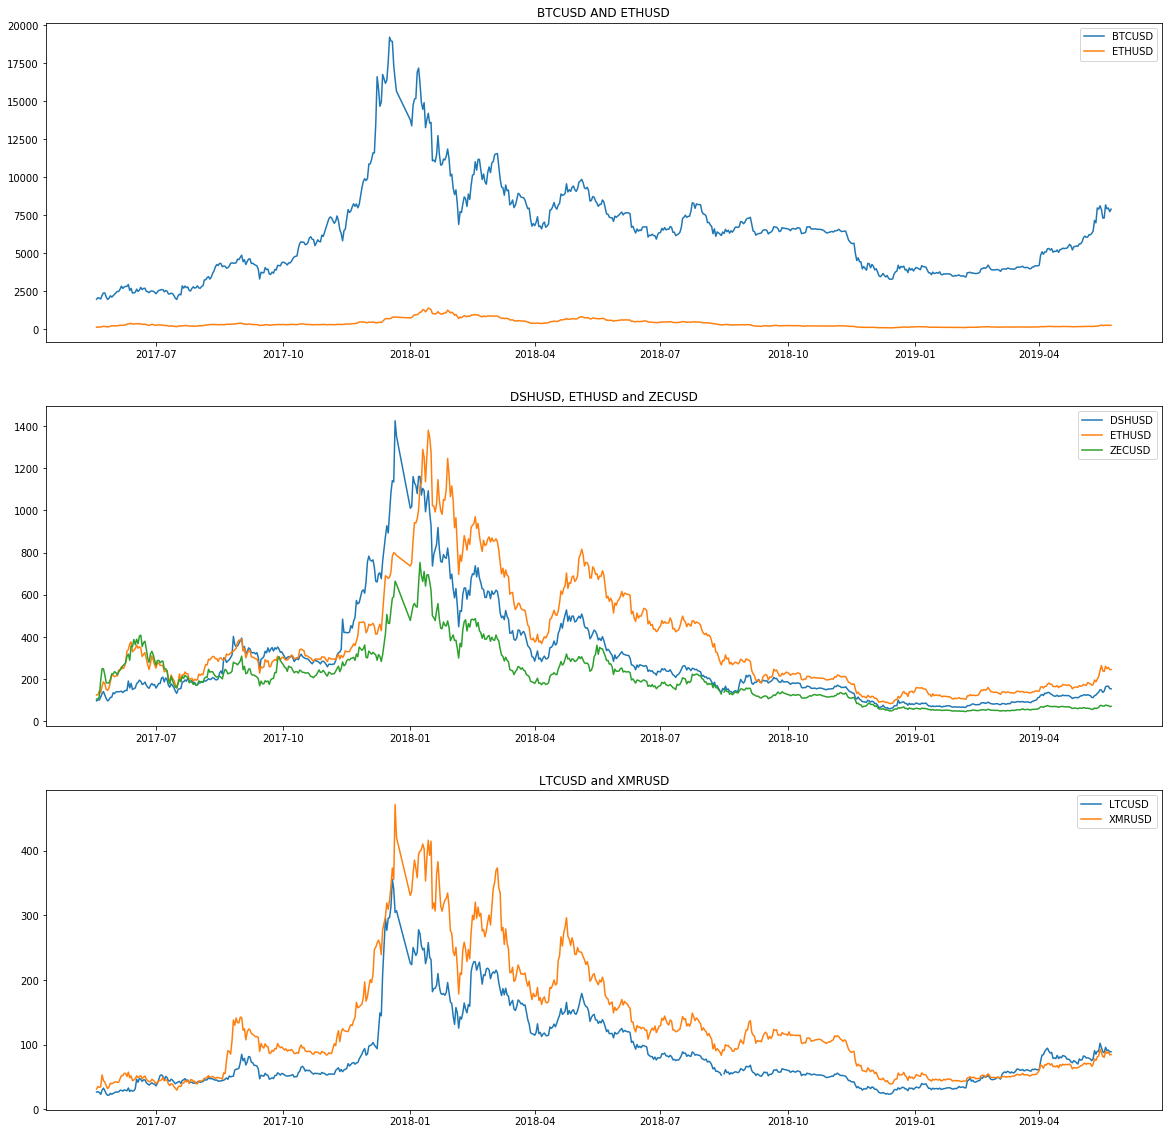

In [19]:
# Adjust plot size
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
# BTCUSD and ETHUSD
plt.plot(last['BTCUSD'])
plt.plot(last['ETHUSD'])
# Title
plt.title('BTCUSD AND ETHUSD')
# Legend
plt.legend(['BTCUSD', 'ETHUSD'])

plt.subplot(3, 1, 2)
# DSHUSD, ETHUSD and ZECUSD
plt.plot(last['DSHUSD'])
plt.plot(last['ETHUSD'])
plt.plot(last['ZECUSD'])
# Title
plt.title('DSHUSD, ETHUSD and ZECUSD')
# Legend
plt.legend(['DSHUSD', 'ETHUSD', 'ZECUSD'])

plt.subplot(3, 1, 3)
# LTCUSD and XMRUSD
plt.plot(last['LTCUSD'])
plt.plot(last['XMRUSD'])
# Title
plt.title('LTCUSD and XMRUSD')
# Legend
plt.legend(['LTCUSD', 'XMRUSD'])

## Pair Trading Strategy

### Training Set

Define the training set

In [20]:
cutoff1 = '2018-05-18'

In [21]:
cutoff2 = '2018-05-21'

In [22]:
training_set = last.loc[:cutoff1]

Check

In [23]:
training_set.head()

,BTCUSD,DSHUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,XMRUSD,XRPUSD,ZECUSD
Date,,,,,,,,,
2017-05-19,1970.0,98.028,7.4993,125.79,26.824,0.090696,31.498,0.31800,105.84
2017-05-20,2068.0,102.450,7.1010,126.30,27.467,0.090696,35.342,0.34689,106.75
2017-05-21,2037.9,102.010,7.6000,144.40,26.050,0.088110,34.140,0.33345,117.71
2017-05-22,1981.9,115.020,7.9482,137.00,23.291,0.089990,34.889,0.28001,194.10
2017-05-23,2228.0,132.250,9.9974,167.02,29.750,0.092496,53.326,0.32090,250.00


In [24]:
training_set.tail()

,BTCUSD,DSHUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,XMRUSD,XRPUSD,ZECUSD
Date,,,,,,,,,
2018-05-14,8679.5,432.95,18.492,722.31,146.83,0.054001,209.66,0.72685,307.18
2018-05-15,8430.9,426.64,18.137,697.70,138.44,0.053850,201.29,0.68357,318.50
2018-05-16,8290.3,411.77,17.414,700.17,138.14,0.048231,196.72,0.69319,361.33
2018-05-17,8077.8,386.06,16.926,672.71,132.80,0.049750,192.51,0.66151,318.00
2018-05-18,8202.1,394.46,17.872,689.66,136.10,0.051777,199.75,0.67392,351.31


In [25]:
training_set.describe()

,BTCUSD,DSHUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,XMRUSD,XRPUSD,ZECUSD
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,6987.291356,423.336629,19.511745,490.360042,106.833167,0.112877,162.266008,0.540041,299.923116
std,3952.418615,258.007650,7.565879,280.976151,72.667836,0.062670,108.389376,0.497804,116.848225
min,1949.900000,97.592000,7.101000,125.790000,21.845000,0.037999,29.744000,0.148210,105.840000
25%,3681.000000,210.000000,14.264000,292.680000,47.440000,0.065403,53.326000,0.206700,222.420000
50%,6780.000000,343.150000,17.110000,354.400000,71.720000,0.082120,129.700000,0.260900,264.330000
75%,9303.000000,557.360000,22.605000,690.690000,159.000000,0.149240,247.000000,0.780990,344.420000
max,19210.000000,1424.600000,42.416000,1380.000000,355.510000,0.372000,470.990000,2.760400,753.570000


### The Hedge Ratio

Model $$ Crypto_1 = HedgeRatio * Crypto_2 $$

In [26]:
crypto1 = 'BTCUSD'

In [27]:
crypto2 = 'ETHUSD'

In [28]:
model = sm.OLS(training_set[crypto1], training_set[crypto2])

In [29]:
result = model.fit()

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BTCUSD   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     3286.
Date:                Fri, 24 May 2019   Prob (F-statistic):          1.37e-180
Time:                        22:14:19   Log-Likelihood:                -3262.3
No. Observations:                 353   AIC:                             6527.
Df Residuals:                     352   BIC:                             6530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ETHUSD        13.4998      0.236     57.321      0.000      13.037      13.963
==============================================================================
Omnibus:                      104.115   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.530
Skew:                           1.366   Prob(JB):                     6.71e-65
Kurtosis:                       6.554   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Set the hedge ratio

In [31]:
hedge_ratio = result.params[crypto2]

Plot

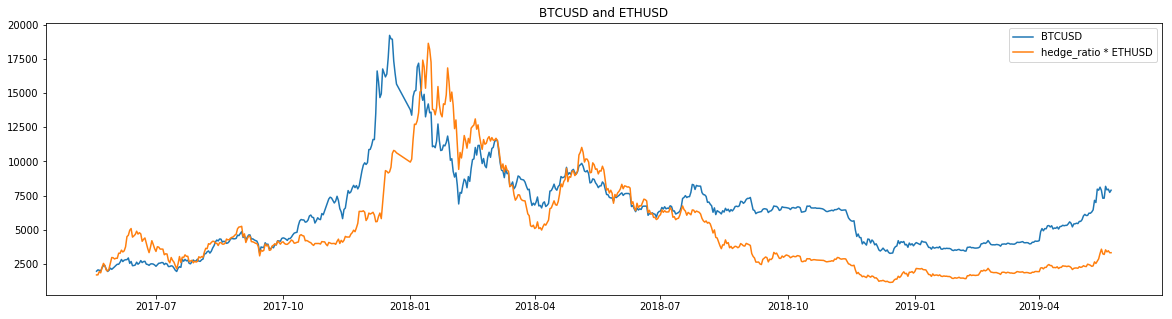

In [32]:
# Adjust plot size
plt.figure(figsize=[20, 5])

plt.plot(last[crypto1])
plt.plot(hedge_ratio * last[crypto2])

# Title
plt.title(crypto1 + ' and ' + crypto2)

# Legend 
plt.legend([crypto1, 'hedge_ratio * ' + crypto2])

### Calculate The Spread

In [33]:
spread = last[crypto1] - hedge_ratio * last[crypto2]

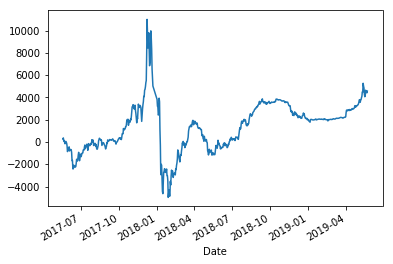

In [34]:
spread.plot()

Mean of the spread on the training set

In [35]:
spread_mean = spread[:cutoff1].mean()

In [36]:
spread_mean

367.54340990074894

Standard deviation of the spread on the training set

In [37]:
spread_std = spread[:cutoff1].std()

In [38]:
spread_std

2472.613284011459

z-score

In [39]:
z_score = (spread - spread_mean) / spread_std

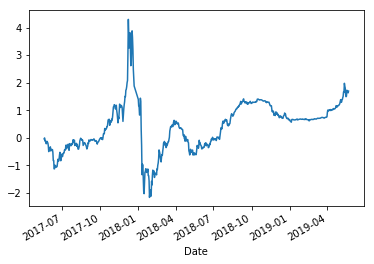

In [40]:
z_score.plot()

### Trading Strategy
Take the following positions:
- Long if the spread is below -1 STD
- Short if the spread is above +1 STD
- Exit if the spread is between -0.5 and +0.5 STD

In [41]:
entry_threshold = 1

In [42]:
exit_threshold = 0.5

Long positions

In [43]:
longs = z_score <= -entry_threshold

Short positions

In [44]:
shorts = z_score >= entry_threshold

Exit positions

In [45]:
exits = np.abs(z_score) <= exit_threshold

Initialize positions

In [46]:
# pd.Series(range(len(z_score)))

In [47]:
positions = pd.DataFrame({crypto1: np.nan * pd.Series(range(len(z_score))),
                          crypto2: np.nan * pd.Series(range(len(z_score)))},
                          index=z_score.index)

Check

In [48]:
positions.head()

,BTCUSD,ETHUSD
Date,,
2017-05-19,NaN,NaN
2017-05-20,NaN,NaN
2017-05-21,NaN,NaN
2017-05-22,NaN,NaN
2017-05-23,NaN,NaN


In [49]:
positions.tail()

,BTCUSD,ETHUSD
Date,,
2019-05-19,NaN,NaN
2019-05-20,NaN,NaN
2019-05-21,NaN,NaN
2019-05-22,NaN,NaN
2019-05-23,NaN,NaN


Fill the positions

In [50]:
[positions[crypto1][longs], positions[crypto2][longs]] = [1, -1]

In [51]:
[positions[crypto1][shorts], positions[crypto2][shorts]] = [-1, 1]

In [52]:
[positions[crypto1][exits], positions[crypto2][exits]] = [0, 0]

Check

In [53]:
positions.head()

,BTCUSD,ETHUSD
Date,,
2017-05-19,0.0,0.0
2017-05-20,0.0,0.0
2017-05-21,0.0,0.0
2017-05-22,0.0,0.0
2017-05-23,0.0,0.0


In [54]:
positions.tail()

,BTCUSD,ETHUSD
Date,,
2019-05-19,-1.0,1.0
2019-05-20,-1.0,1.0
2019-05-21,-1.0,1.0
2019-05-22,-1.0,1.0
2019-05-23,-1.0,1.0


Make sure that existing positions are carried forward except when there is an exit

In [55]:
positions.fillna(method='ffill', inplace=True)

Check

In [56]:
positions.head()

,BTCUSD,ETHUSD
Date,,
2017-05-19,0.0,0.0
2017-05-20,0.0,0.0
2017-05-21,0.0,0.0
2017-05-22,0.0,0.0
2017-05-23,0.0,0.0


In [57]:
positions.tail()

,BTCUSD,ETHUSD
Date,,
2019-05-19,-1.0,1.0
2019-05-20,-1.0,1.0
2019-05-21,-1.0,1.0
2019-05-22,-1.0,1.0
2019-05-23,-1.0,1.0


Plot

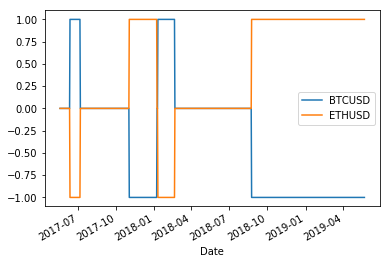

In [58]:
positions.plot()

### Calculate The PnL

Calculate the returns

In [59]:
returns = pd.DataFrame({crypto1: last[crypto1],
                        crypto2: last[crypto2]})

In [60]:
returns = returns.pct_change()

Check

In [61]:
returns.head()

,BTCUSD,ETHUSD
Date,,
2017-05-19,NaN,NaN
2017-05-20,0.049746,0.004054
2017-05-21,-0.014555,0.143310
2017-05-22,-0.027479,-0.051247
2017-05-23,0.124174,0.219124


In [62]:
returns.tail()

,BTCUSD,ETHUSD
Date,,
2019-05-19,0.118610,0.105179
2019-05-20,-0.031854,-0.041694
2019-05-21,0.006633,0.024229
2019-05-22,-0.029773,-0.042167
2019-05-23,0.020906,0.001302


Lag the positions, since we calculate the spread at last price

In [63]:
positions = positions.shift(periods=1)

Calculate the pnl

In [64]:
pnl = returns * positions

In [65]:
pnl.head()

,BTCUSD,ETHUSD
Date,,
2017-05-19,NaN,NaN
2017-05-20,0.0,0.0
2017-05-21,-0.0,0.0
2017-05-22,-0.0,-0.0
2017-05-23,0.0,0.0


In [66]:
pnl.tail()

,BTCUSD,ETHUSD
Date,,
2019-05-19,-0.118610,0.105179
2019-05-20,0.031854,-0.041694
2019-05-21,-0.006633,0.024229
2019-05-22,0.029773,-0.042167
2019-05-23,-0.020906,0.001302


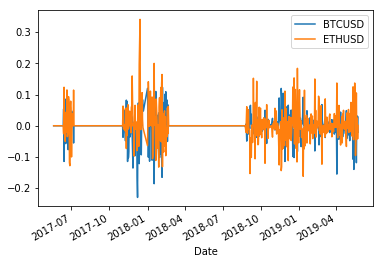

In [67]:
pnl.plot()

Calculate the net pnl

In [68]:
pnl_net = pnl.sum(axis='columns')

In [69]:
pnl_net.head()

Date
2017-05-19    0.0
2017-05-20    0.0
2017-05-21    0.0
2017-05-22    0.0
2017-05-23    0.0
dtype: float64

In [70]:
pnl_net.tail()

Date
2019-05-19   -0.013431
2019-05-20   -0.009840
2019-05-21    0.017595
2019-05-22   -0.012394
2019-05-23   -0.019604
dtype: float64

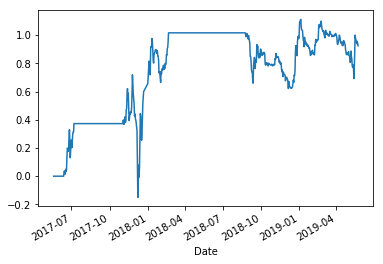

In [71]:
pnl_net.cumsum().plot()

### Calculate the Sharpe ratio

Under the training set

In [72]:
sharpe_training = np.sqrt(252) * np.average(pnl_net[:cutoff1]) / np.std(pnl_net[:cutoff1])

In [73]:
sharpe_training

1.0977269760285295

Under the test set

In [74]:
sharpe_test = np.sqrt(252) * np.average(pnl_net[cutoff2:]) / np.std(pnl_net[cutoff2:])

In [75]:
sharpe_test

-0.1539972434439597

## Conclusion
...